In [1]:
import os
import pickle as pkl
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append(os.path.join(os.getcwd(), '..', '..', '..'))
from settings import RESULTS_PATH

In [3]:
os.listdir(RESULTS_PATH)

['sigmoid_relu_experiment.pkl',
 'initialization_plain_xavier_experiment.pkl',
 'batch_size_experiment.pkl',
 'layer_size_experiment.pkl']

In [4]:
experiment_path = os.path.join(RESULTS_PATH, 'batch_size_experiment.pkl')

In [5]:
with open(experiment_path, 'rb') as file:
    results = pkl.load(file)

In [6]:
results = [item for sublist in results for item in sublist]

In [7]:
results = pd.DataFrame(results)

In [13]:
results.columns = ['train_loss', 'val_loss', 'test_loss', 'train_accuracy', 'val_accuracy',
                   'test_accuracy', 'repeat', "Wielkość batch'a", 'epoch']
results.head()

,train_loss,val_loss,test_loss,train_accuracy,val_accuracy,test_accuracy,repeat,Wielkość batch'a,epoch
0,2.348405,2.348893,2.357201,0.09908,0.0967,0.0958,0,1,0
1,0.255417,0.239544,6.730930,0.92688,0.9323,0.9272,0,1,1
2,0.194221,0.188884,7.451986,0.94462,0.9477,0.9431,0,1,2
3,0.161587,0.165549,7.787107,0.95334,0.9537,0.9495,0,1,3
4,0.143450,0.151682,8.229412,0.95934,0.9573,0.9536,0,1,4


In [9]:
results["Wielkość batch'a"].unique()

array([   1,   10,   32,   64,  128,  256,  512, 1024])

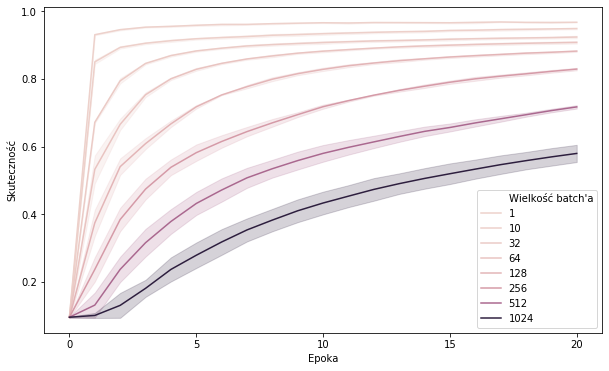

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
palette = sns.color_palette("mako_r", results["Wielkość batch'a"].nunique())
sns.lineplot(x='epoch', 
             y='val_accuracy', 
             hue="Wielkość batch'a", 
             hue_order=sorted(results["Wielkość batch'a"].unique()),
             data=results, 
             ax=ax,
             legend="full", ci='sd')
ax.set_ylabel('Skuteczność')
ax.set_xlabel('Epoka')
ax.set_xticks(range(min(results['epoch']), int(max(results['epoch']))+1, 5))
# ax.set_ylim(0.80, 1.0)
plt.show()